# Comparando modelos de Forecasting (Time Series).

**Nesse projeto irei comparar os três métodos de Time Series Forecasting que temos, o clássico ARIMA(Autoregressive Integrated Moving Average), o Facebook Prophet e o LSTM (Long Short term Memory) já da parte de redes neurais (Deep Learning)**

### ARIMA (Autoregressive Integrated Moving Average)

Terminologias em ARIMA

O modelo ARIMA pode ser basicamente resumido por três fatores:

p = o número de termos autorregressivos
- p é o número de termos auto-regressivos (parte AR). Permite incorporar o efeito de valores
  passados em nosso modelo. Intuitivamente, isso seria semelhante ao afirmar que é
  provável que esteja quente amanhã se estiver quente nos últimos três dias.

d = o número é o fator que vamos aplicar para resolver a estacionaridade
- d é o número de diferenças não sazonais necessárias para a estacionariedade.
  Intuitivamente, isso seria semelhante ao afirmar que provavelmente haverá a mesma
  temperatura amanhã se a diferença de temperatura nos últimos três dias tiver sido muito
  pequena.

q = o número de termos da média móvel
- q é o número de erros de previsão atrasados na equação de previsão (parte MA). Isso nos
  permite definir o erro do nosso modelo como uma combinação linear dos valores de erro
  observados em momentos anteriores no passado.
  Estes são os três números inteiros (p, d, q) usados para parametrizar os modelos ARIMA.
  Portanto, isso é chamado de modelo “ARIMA (p, d, q)”.

### Facebook Prophet

O Prophet é um procedimento para prever dados de séries temporais com base em um modelo aditivo em que tendências não lineares são ajustadas com sazonalidade anual, semanal e diária, além dos efeitos de feriados. Funciona melhor com séries temporais que têm fortes efeitos sazonais e várias temporadas de dados históricos. O Prophet é robusto para dados ausentes e mudanças na tendência, e normalmente lida bem com outliers.

### LSTM (Long Short term Memory)

A LSTM é uma arquitetura de rede neural recorrente (RNN) que “lembra” valores em intervalos arbitrários. A LSTM é bem adequada para classificar, processar e prever séries temporais com intervalos de tempo de duração desconhecida. A insensibilidade relativa ao comprimento do gap dá uma vantagem à LSTM em relação a RNNs tradicionais (também chamadas “vanilla”), Modelos Ocultos de Markov (MOM) e outros métodos de aprendizado de sequências.

A estrutura de uma RNN é muito semelhante ao Modelo Oculto de Markov. No entanto, a principal diferença é como os parâmetros são calculados e construídos. Uma das vantagens da LSTM é a insensibilidade ao comprimento do gap. RNN e MOM dependem do estado oculto antes da emissão / sequência. Se quisermos prever a sequência após 1.000 intervalos em vez de 10, o modelo esqueceu o ponto de partida até então. Mas um modelo LSTM é capaz de “lembrar” por conta de sua estrutura de células, o diferencial da arquitetura LSTM.

A LSTM possui uma estrutura em cadeia que contém quatro redes neurais e diferentes blocos de memória chamados células.

<img src="https://i.imgur.com/Ooq3hRT.png" />

A informação é retida pelas células e as manipulações de memória são feitas pelos portões (gates). Existem três portões:

Forget Gate: As informações que não são mais úteis no estado da célula são removidas com o forget gate. Duas entradas: x_t (entrada no momento específico) e h_t-1 (saída de célula anterior) são alimentadas ao gate e multiplicadas por matrizes de peso, seguidas pela adição do bias. O resultante é passado por uma função de ativação que fornece uma saída binária. Se para um determinado estado de célula a saída for 0, a informação é esquecida e para a saída 1, a informação é retida para uso futuro.

Input Gate: A adição de informações úteis ao estado da célula é feita pelo input gate. Primeiro, a informação é regulada usando a função sigmoide que filtra os valores a serem lembrados de forma similar ao forget gate usando as entradas h_t-1 e x_t. Então, um vetor é criado usando a função tanh que dá saída de -1 a +1, que contém todos os valores possíveis de h_t-1 e x_t. Os valores do vetor e os valores regulados são multiplicados para obter as informações úteis

Output Gate: A tarefa de extrair informações úteis do estado da célula atual para ser apresentadas como uma saída é feita pelo output gate. Primeiro, um vetor é gerado aplicando a função tanh na célula. Então, a informação é regulada usando a função sigmóide que filtra os valores a serem lembrados usando as entradas h_t-1 e x_t. Os valores do vetor e os valores regulados são multiplicados para serem enviados como uma saída e entrada para a próxima célula.

A célula RNN recebe duas entradas, a saída do último estado oculto e a observação no tempo = t. Além do estado oculto, não há informações sobre o passado para se lembrar. A memória de longo prazo é geralmente chamada de estado da célula. As setas em loop indicam a natureza recursiva da célula. Isso permite que as informações dos intervalos anteriores sejam armazenadas na célula LSTM. O estado da célula é modificado pelo forget gate colocado abaixo do estado da célula e também ajustado pela porta de modulação de entrada. Da equação, o estado da célula anterior esquece, multiplica-se com a porta do esquecimento e adiciona novas informações através da saída das portas de entrada.

Algumas das famosas aplicações das LSTMs incluem:

- Modelagem de Linguagem
- Tradução de Idiomas
- Legendas em Imagens
- Geração de Texto
- Chatbots

# Dados:

## Vendas de autoveículos no Brasil.

<img src="https://i.imgur.com/isgusta.jpg" />

Valor da produção de veículos automotores no País. Refletem o desempenho das vendas das empresas associadas a(o): estoque e venda de veículos pelas concessionárias produção e vendas de veículos e congêneres produção e vendas de motociclos.

Fonte: https://www3.bcb.gov.br/sgspub/consultarvalores/consultarValoresSeries.do?method=consultarGraficoPorId&hdOidSeriesSelecionadas=1378

## Vamos lá !

In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")

In [2]:
%time data = pd.read_csv('C:/Users/skite/OneDrive/Documentos/GitHub/Projeto_comparacao_entre_modelos_TimeSeries/bcdata.sgs.1378.csv', sep = ';', encoding  = 'UTF-8')

Wall time: 5.98 ms


In [3]:
data.head()

,data,valor
0,01/01/1981,87939
1,01/02/1981,65251
2,01/03/1981,64065
3,01/04/1981,69042
4,01/05/1981,62966


In [4]:
data.tail()

,data,valor
472,01/05/2020,56266
473,01/06/2020,135140
474,01/07/2020,184818
475,01/08/2020,193650
476,01/09/2020,219033


**Temos dados de 01/01/1981 até 01/09/2020, ou seja, 39 anos de registro de venda de Autoveículos.**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    477 non-null    object
 1   valor   477 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.6+ KB


**Ajuste da variável data**

In [6]:
data['data'] = data['data'].str[3:]

In [7]:
data['valor'] = data.valor.astype('float')

**Vamos determinar a data como índice e aplicar o Datetime para transformar a variável.**

In [8]:
data.data = pd.to_datetime(data.data)

In [9]:
data = data.set_index("data")
data.head()

,valor
data,
1981-01-01,87939.0
1981-02-01,65251.0
1981-03-01,64065.0
1981-04-01,69042.0
1981-05-01,62966.0


**Vamos definir a frequência do dados para mensal**

In [10]:
data.index.freq = 'MS'

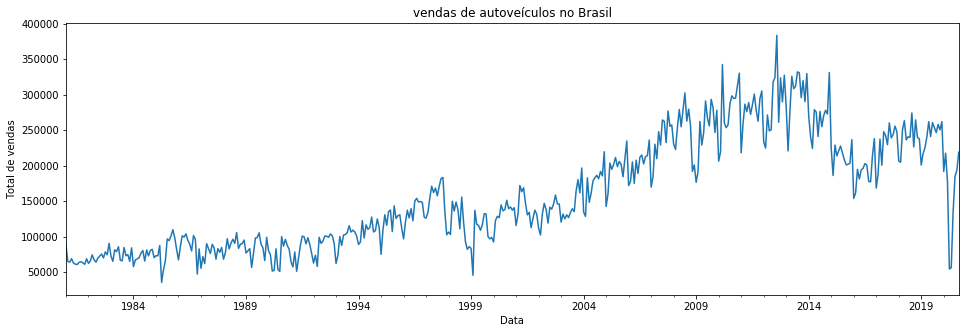

In [11]:
ax = data['valor'].plot(figsize = (16,5), title = "vendas de autoveículos no Brasil")
ax.set(xlabel='Data', ylabel='Total de vendas');

**Analisando as vendas ao longo dos anos, mostra que as vendas de autoveículos não é nada sazonal onde temos grande quedas próximos dos anos de 1985, 1999, e 2020**

**Vamos utilizar o "seasonal_decompose" para verificar o comportamento da série**

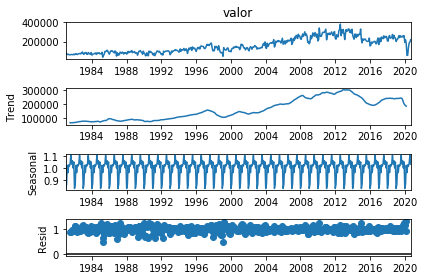

In [12]:
a = seasonal_decompose(data["valor"], model = "multiplicative")
a.plot();

**Seasonal**

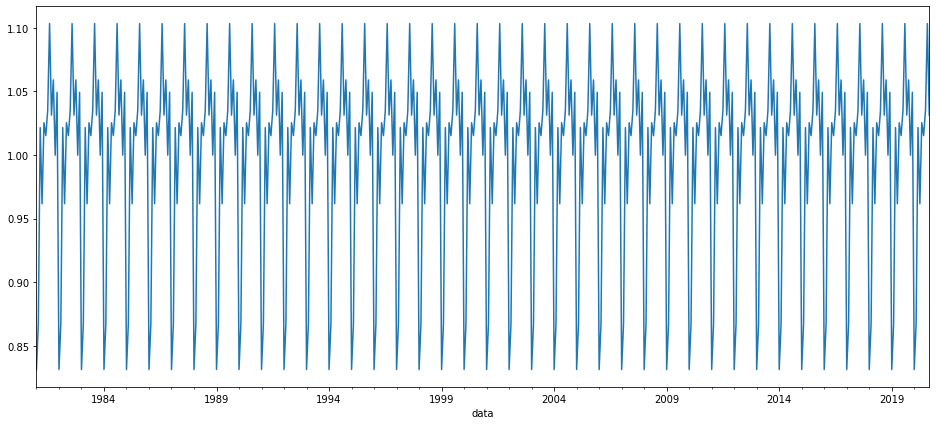

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot();

# Previsão ARIMA

**Vamos executar a função auto_arima () para obter os melhores valores p, d, q**

In [14]:
auto_arima(data['valor'], seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  477
Model:             SARIMAX(3, 1, 3)x(3, 0, 3, 12)   Log Likelihood               -5407.920
Date:                            Tue, 03 Nov 2020   AIC                          10843.841
Time:                                    23:12:15   BIC                          10902.156
Sample:                                         0   HQIC                         10866.771
                                            - 477                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    680.2933    883.931      0.770      0.442   -1052.179    2412.765
ar.L1         -0.6624      0.094     -7.034      0.000      -0.847      -0.478
ar.L2         -0.4167      0.101     -4.117      0.000      -0.615      -0.218
ar.L3          0.4860      0.087      5.594      0.000       0.316       0.656
ma.L1          0.3255      0.085      3.810      0.000       0.158       0.493
ma.L2          0.0016      0.081      0.020      0.984      -0.157       0.160
ma.L3         -0.7902      0.070    -11.325      0.000      -0.927      -0.653
ar.S.L12      -0.4523      0.106     -4.255      0.000      -0.661      -0.244
ar.S.L24       0.2993      0.088      3.389      0.001       0.126       0.472
ar.S.L36       0.8634      0.097      8.914      0.000       0.674       1.053
ma.S.L12       0.6942      0.163      4.259      0.000       0.375       1.014
ma.S.L24      -0.0552      0.179     -0.309      0.757      -0.405       0.295
ma.S.L36      -0.6282      0.152     -4.140      0.000      -0.926      -0.331
sigma2      5.874e+08      0.005   1.23e+11      0.000    5.87e+08    5.87e+08
===================================================================================
Ljung-Box (Q):                       38.99   Jarque-Bera (JB):               686.40
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):               4.08   Skew:                            -0.90
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.71e+26. Standard errors may be unstable.
"""

**Como podemos ver os melhores parametros que o  auto_arima() nos retornou foi SARIMAX(3, 1, 3)x(3, 0, 3, 12)**

**Ok, agora vamos separar os dados de treino e teste**

In [15]:
train_data = data[:len(data)-24]
test_data = data[len(data)-24:]

In [16]:
train_data

,valor
data,
1981-01-01,87939.0
1981-02-01,65251.0
1981-03-01,64065.0
1981-04-01,69042.0
1981-05-01,62966.0
...,...
2018-05-01,236388.0
2018-06-01,240714.0
2018-07-01,239856.0


In [17]:
test_data

,valor
data,
2018-10-01,264434.0
2018-11-01,239547.0
2018-12-01,237798.0
2019-01-01,200890.0
2019-02-01,217205.0
2019-03-01,225222.0
2019-04-01,240679.0
2019-05-01,261975.0
2019-06-01,240913.0


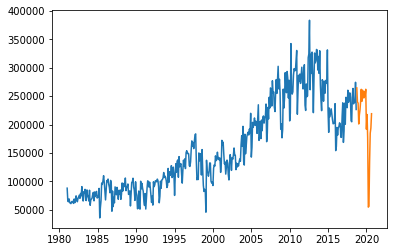

In [18]:
plt.plot(train_data)
plt.plot(test_data)

## Vamos aplicar os parâmetros obtidos pelo o auto_arima() no SARIMAX e compará-lo com os dados reais.

In [19]:
arima_model = SARIMAX(train_data['valor'], order = (3,1,3), seasonal_order = (3,0,3,12))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              valor   No. Observations:                  453
Model:             SARIMAX(3, 1, 3)x(3, 0, 3, 12)   Log Likelihood               -5101.430
Date:                            Tue, 03 Nov 2020   AIC                          10228.859
Time:                                    23:12:45   BIC                          10282.337
Sample:                                01-01-1981   HQIC                         10249.933
                                     - 09-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7539      0.095     -7.936      0.000      -0.940      -0.568
ar.L2         -0.5409      0.108     -4.992      0.000      -0.753      -0.329
ar.L3          0.3807      0.090      4.246      0.000       0.205       0.556
ma.L1          0.2732      0.077      3.535      0.000       0.122       0.425
ma.L2          0.0631      0.073      0.868      0.385      -0.079       0.205
ma.L3         -0.7942      0.072    -11.107      0.000      -0.934      -0.654
ar.S.L12       0.3469     85.755      0.004      0.997    -167.729     168.423
ar.S.L24       0.5707     29.007      0.020      0.984     -56.282      57.423
ar.S.L36      -0.0025     49.468  -5.01e-05      1.000     -96.958      96.953
ma.S.L12      -0.0400     85.746     -0.000      1.000    -168.099     168.019
ma.S.L24      -0.5559      2.691     -0.207      0.836      -5.831       4.719
ma.S.L36       0.0040     47.955    8.3e-05      1.000     -93.986      93.994
sigma2      5.229e+08      0.000   5.15e+12      0.000    5.23e+08    5.23e+08
===================================================================================
Ljung-Box (Q):                       55.39   Jarque-Bera (JB):                95.08
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               2.91   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.44e+28. Standard errors may be unstable.
"""

**Vamos comparar o modelo.**

In [20]:
arima_pred = arima_result.predict(start = len(train_data), end = len(data)-1, typ="levels").rename("Previsão ARIMA")
arima_pred

2018-10-01    249396.494838
2018-11-01    245123.873012
2018-12-01    250768.012282
2019-01-01    218875.325186
2019-02-01    205909.819918
2019-03-01    232919.794924
2019-04-01    248475.876007
2019-05-01    231175.734169
2019-06-01    234578.999549
2019-07-01    251787.820688
2019-08-01    250039.436622
2019-09-01    229509.348009
2019-10-01    248885.190957
2019-11-01    237159.254059
2019-12-01    261085.184819
2020-01-01    220748.847045
2020-02-01    201607.721058
2020-03-01    242058.306437
2020-04-01    241611.440137
2020-05-01    233549.237505
2020-06-01    246766.343328
2020-07-01    249009.320374
2020-08-01    245296.955252
2020-09-01    242111.254141
Freq: MS, Name: Previsão ARIMA, dtype: float64

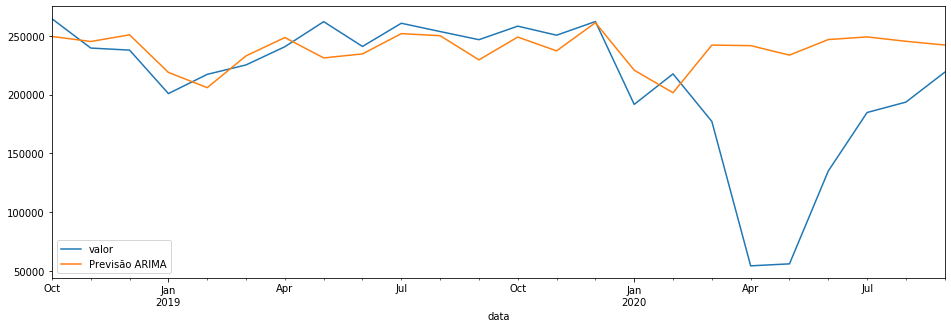

In [21]:
test_data['valor'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

**Note como a previsão do modelo ARIMA se comporta, observe também que ele não consegue acompanhar a queda brusca que tivemos nas vendas de Autoveículos no mes de abril até maio, isso se dá ao fato que nesses dois mês tivemos o pico do  da COVID-19 no Brasil onde a população teve que ficar confinada em seus lares e fabricas e lojas tiveram que ser fechadas para conter o  avanço dos casos da COVID no país.**

**Por esse motivo essa queda brusta será muito dificil de ser acompanlhada, poís uma queda desse tipo não ocorreu nos 39 anos anteriores.**

In [22]:
arima_rmse_error = rmse(test_data['valor'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = data['valor'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 3921934631.3004847
RMSE Error: 62625.35134672288
Mean: 158795.67714884697


In [23]:
test_data['valor'] = arima_pred

# LSTM Forecast

**Primeiro passo vamos fazer a normalização dos dados com o MinMaxScaler**

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [25]:
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

**Para utilizar o LSTM vamos usar o Time Series Generator object.**

In [26]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

Using TensorFlow backend.


In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

**Criação da Rede com o Keras**

In [28]:
lstm_model = Sequential()

**Camadas da LSTM**

In [29]:
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))

**Compilação do Modelo**

In [30]:
lstm_model.compile(optimizer='adam', loss='mse')

**Sumário do Modelo**

In [31]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


**Ajuste do Modelo**

In [32]:
lstm_model.fit_generator(generator, epochs=50)

Epoch 1/50
441/441 [==============================] - 4s 10ms/step - loss: 0.0102
Epoch 2/50
441/441 [==============================] - 4s 10ms/step - loss: 0.0067
Epoch 3/50
441/441 [==============================] - 4s 10ms/step - loss: 0.0063
Epoch 4/50
441/441 [==============================] - 4s 10ms/step - loss: 0.0060
Epoch 5/50
441/441 [==============================] - 4s 10ms/step - loss: 0.0057
Epoch 6/50
441/441 [==============================] - 4s 9ms/step - loss: 0.0051
Epoch 7/50
441/441 [==============================] - 4s 9ms/step - loss: 0.0052
Epoch 8/50
441/441 [==============================] - 4s 10ms/step - loss: 0.0048
Epoch 9/50
441/441 [==============================] - 4s 10ms/step - loss: 0.0055
Epoch 10/50
441/441 [==============================] - 4s 9ms/step - loss: 0.0049
Epoch 11/50
441/441 [==============================] - 5s 11ms/step - loss: 0.0047
Epoch 12/50
441/441 [==============================] - 6s 13ms/step - loss: 0.0046
Epoch 13/50
441/

### Agora iremos fazer o gráfico da função de perda

In [33]:
# losses_lstm = lstm_model.history.history['loss']
# plt.figure(figsize=(12,4))
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.xticks(np.arange(0,39,1))
# plt.plot(range(len(losses_lstm)),losses_lstm);

In [34]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

**Como os dados foram normalizados precisamos retorná-los à forma original.**

**Esses são os valores normalizados**

In [35]:
lstm_predictions_scaled

[array([0.59441847], dtype=float32),
 array([0.6269797], dtype=float32),
 array([0.62995964], dtype=float32),
 array([0.5982697], dtype=float32),
 array([0.58925307], dtype=float32),
 array([0.62647474], dtype=float32),
 array([0.6472356], dtype=float32),
 array([0.63442], dtype=float32),
 array([0.63771015], dtype=float32),
 array([0.6395679], dtype=float32),
 array([0.6688395], dtype=float32),
 array([0.6376403], dtype=float32),
 array([0.64482677], dtype=float32),
 array([0.6570745], dtype=float32),
 array([0.66082746], dtype=float32),
 array([0.6540837], dtype=float32),
 array([0.65030617], dtype=float32),
 array([0.66112065], dtype=float32),
 array([0.67045057], dtype=float32),
 array([0.670198], dtype=float32),
 array([0.67254645], dtype=float32),
 array([0.6748265], dtype=float32),
 array([0.6848158], dtype=float32),
 array([0.6792606], dtype=float32)]

**Vamos reverter os valores o inverse_transform**

In [36]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
lstm_predictions

array([[242412.90527642],
       [253742.58963227],
       [254779.45774257],
       [243752.94246435],
       [240615.60500026],
       [253566.88512921],
       [260790.61739504],
       [256331.43122852],
       [257476.24810398],
       [258122.65484989],
       [268307.70898521],
       [257451.94148481],
       [259952.47456193],
       [264214.07612026],
       [265519.91397798],
       [263173.43343258],
       [261859.03018773],
       [265621.9312644 ],
       [268868.2752049 ],
       [268780.40221393],
       [269597.53599823],
       [270390.88164926],
       [273866.66597188],
       [271933.7297833 ]])

### Vamos comparar o modelo.

In [37]:
test_data['LSTM_Predictions'] = lstm_predictions

In [38]:
test_data

,valor,LSTM_Predictions
data,,
2018-10-01,249396.494838,242412.905276
2018-11-01,245123.873012,253742.589632
2018-12-01,250768.012282,254779.457743
2019-01-01,218875.325186,243752.942464
2019-02-01,205909.819918,240615.605000
2019-03-01,232919.794924,253566.885129
2019-04-01,248475.876007,260790.617395
2019-05-01,231175.734169,256331.431229
2019-06-01,234578.999549,257476.248104


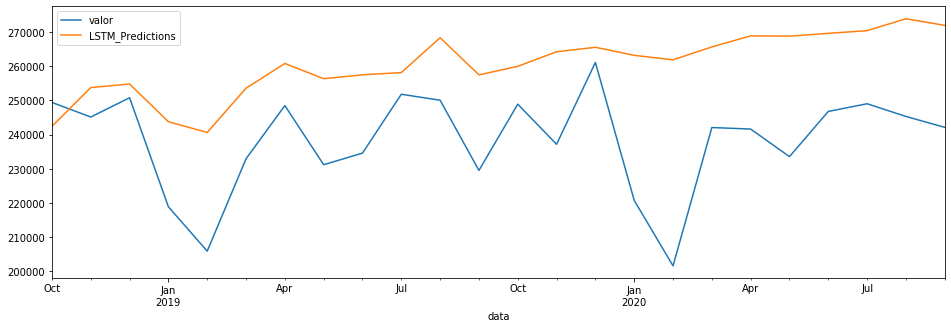

In [39]:
test_data['valor'].plot(figsize = (16,5), legend=True)
test_data['LSTM_Predictions'].plot(legend = True);

**Cálculo do Erro**

In [40]:
lstm_rmse_error = rmse(test_data['valor'], test_data["LSTM_Predictions"])
lstm_mse_error = lstm_rmse_error**2
mean_value = data['valor'].mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')

MSE Error: 682494446.2999716
RMSE Error: 26124.5946628837
Mean: 160112.75385809888
